<a href="https://colab.research.google.com/github/mounikayacham/Machine_Learning_Projects/blob/main/breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading Dataset into a variable

In [113]:
data=load_breast_cancer()

exploring Dataset

In [114]:
df=pd.DataFrame(data.data,columns=data.feature_names)
df.sample(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
247,12.89,14.11,84.95,512.2,0.08760,0.13460,0.137400,0.039800,0.1596,0.06409,...,14.39,17.70,105.00,639.1,0.12540,0.58490,0.772700,0.15610,0.2639,0.11780
60,10.17,14.88,64.55,311.9,0.11340,0.08061,0.010840,0.012900,0.2743,0.06960,...,11.02,17.45,69.86,368.6,0.12750,0.09866,0.021680,0.02579,0.3557,0.08020
490,12.25,22.44,78.18,466.5,0.08192,0.05200,0.017140,0.012610,0.1544,0.05976,...,14.17,31.99,92.74,622.9,0.12560,0.18040,0.123000,0.06335,0.3100,0.08203
58,13.05,19.31,82.61,527.2,0.08060,0.03789,0.000692,0.004167,0.1819,0.05501,...,14.23,22.25,90.24,624.1,0.10210,0.06191,0.001845,0.01111,0.2439,0.06289
407,12.85,21.37,82.63,514.5,0.07551,0.08316,0.061260,0.018670,0.1580,0.06114,...,14.40,27.01,91.63,645.8,0.09402,0.19360,0.183800,0.05601,0.2488,0.08151


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [116]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [117]:
df2=pd.DataFrame(data.target,columns=['target'])
df2.sample(10)

,target
167,0
181,0
496,1
302,0
512,0
251,1
292,1
191,1
327,1
528,1


([<matplotlib.patches.Wedge at 0x7accbdf7f010>,
 [Text(-0.4286547583668386, 1.0130424957174637, '1'),
  Text(0.4286549676938969, -1.0130424071436221, '0')],
 [Text(-0.23381168638191194, 0.5525686340277074, '62.74%'),
  Text(0.23381180056030737, -0.5525685857147029, '37.26%')])

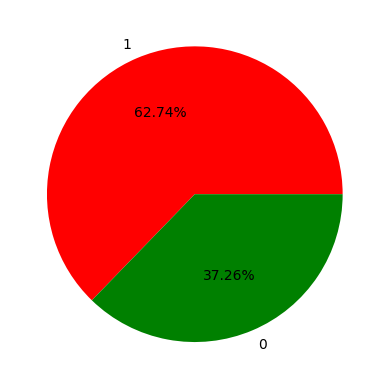

In [118]:
class_counts=df2['target'].value_counts()
plt.pie(class_counts,labels=class_counts.index,
autopct='%1.2f%%',colors=['red','green'])

Splitting data

In [119]:
X_train,X_test,y_train,y_test=train_test_split(data.data,data.target,test_size=0.33,random_state=42)

In [120]:
model=GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

Making Predictions

In [121]:
y_pred=model.predict(X_test)
print(y_pred[:10])

[1 0 0 1 1 0 0 0 1 1]


In [122]:
accuracy=accuracy_score(y_test,y_pred)
print(f'Model Accuracy  of the GaussianNb: {accuracy*100:.2f}%')

Model Accuracy  of the GaussianNb: 94.15%


In [123]:
from sklearn.svm import SVC as svm

In [124]:
model2=svm(probability=True)
model2.fit(X_train,y_train)
y_pred2=model2.predict(X_test)
acc2=accuracy_score(y_test,y_pred2)
print(f'accuracy Score of the SVMClassifier:{acc2*100:.2f}%')

accuracy Score of the SVMClassifier:95.21%


In [125]:
from sklearn.linear_model import LogisticRegression
model3=LogisticRegression()
model3.fit(X_train,y_train)
y_pred3=model3.predict(X_test)
acc3=accuracy_score(y_test,y_pred3)
print(f'Accuracy Score of the LogisticRegression : {acc3*100:.2f}%')

Accuracy Score of the LogisticRegression : 95.74%


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [126]:
from sklearn.neighbors import KNeighborsClassifier
model4=KNeighborsClassifier()
model4.fit(X_train,y_train)
y_pred4=model4.predict(X_test)
acc4=accuracy_score(y_test,y_pred)
print(f'Accuracy Score of the KNeighborsClassifier : {acc4*100:.2f}%')

Accuracy Score of the KNeighborsClassifier : 94.15%


In [127]:
from sklearn.ensemble import RandomForestClassifier
model5=RandomForestClassifier()
model5.fit(X_train,y_train)
y_pred5=model5.predict(X_test)
acc5=accuracy_score(y_test,y_pred5)
print(f"Accuracy Score of The RandomForest:{acc5*100:.2f}%")

Accuracy Score of The RandomForest:96.81%


In [128]:
from xgboost import XGBClassifier
model6=XGBClassifier()
model6.fit(X_train,y_train)
y_pred6=model6.predict(X_test)
acc6=accuracy_score(y_test,y_pred6)
print(f"Accuracy Score of the XGBClassifier : {acc6*100:.2f}%")

Accuracy Score of the XGBClassifier : 96.28%


In [129]:
from sklearn.tree import DecisionTreeClassifier
model7=DecisionTreeClassifier()
model7.fit(X_train,y_train)
y_pred7=model7.predict(X_test)
acc7=accuracy_score(y_test,y_pred7)
print(f"Accuracy Score of the DecisionTreeClassifier : {acc7*100:.2f}%")


Accuracy Score of the DecisionTreeClassifier : 92.02%


**ALL Suitable Algorithms**

In [130]:
print(f'Accuracy Score of the GaussianNB:  {accuracy*100:.2f}%')
print(f'Accuracy Score of the SVMClassifier: {acc2*100:.2f}%')
print(f'Accuracy Score of the LogisticRegression : {acc3*100:.2f}%')
print(f'Accuracy Score of the KNeighborsClassifier : {acc4*100:.2f}%')
print(f"Accuracy Score of The RandomForest : {acc5*100:.2f}%")
print(f"Accuracy Score of the XGBClassifier : {acc6*100:.2f}%")
print(f"Accuracy Score of the DecisionTreeClassifier : {acc7*100:.2f}%")


Accuracy Score of the GaussianNB:  94.15%
Accuracy Score of the SVMClassifier: 95.21%
Accuracy Score of the LogisticRegression : 95.74%
Accuracy Score of the KNeighborsClassifier : 94.15%
Accuracy Score of The RandomForest : 96.81%
Accuracy Score of the XGBClassifier : 96.28%
Accuracy Score of the DecisionTreeClassifier : 92.02%


**Evaluation Metrics for All the models**

In [131]:
models = {
    "Logistic Regression": model3,
    "SVM":model2,
    "Random Forest": model5,
    "XGBoost": model6,
    "GaussianNB": model,
    "KNN": model4,
    "Decision Tree": model7
}


In [132]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
results=[]
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-score": f1
    })

    print(f"\n{name} Classification Report:\n", classification_report(y_test, y_pred))

# 6. Create a results DataFrame
results_df = pd.DataFrame(results)
print("\nModel Comparison:\n", results_df)



Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        67
           1       0.97      0.97      0.97       121

    accuracy                           0.96       188
   macro avg       0.95      0.95      0.95       188
weighted avg       0.96      0.96      0.96       188


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.88      0.93        67
           1       0.94      0.99      0.96       121

    accuracy                           0.95       188
   macro avg       0.96      0.94      0.95       188
weighted avg       0.95      0.95      0.95       188



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93        67
           1       0.95      0.98      0.96       121

    accuracy                           0.95       188
   macro avg       0.95      0.94      0.95       188
weighted avg       0.95      0.95      0.95       188


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95        67
           1       0.96      0.98      0.97       121

    accuracy                           0.96       188
   macro avg       0.96      0.95      0.96       188
weighted avg       0.96      0.96      0.96       188


GaussianNB Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.92        67
           1       0.95      0.96      0.95       121

    accuracy                           0.94       188
   macro avg       0

**Prediction with the Input**

In [133]:
best_model = models["SVM"]  # already trained in the loop


In [134]:
import numpy as np
sample = X_test[0]   # get first sample from test set
print(sample)

[1.247e+01 1.860e+01 8.109e+01 4.819e+02 9.965e-02 1.058e-01 8.005e-02
 3.821e-02 1.925e-01 6.373e-02 3.961e-01 1.044e+00 2.497e+00 3.029e+01
 6.953e-03 1.911e-02 2.701e-02 1.037e-02 1.782e-02 3.586e-03 1.497e+01
 2.464e+01 9.605e+01 6.779e+02 1.426e-01 2.378e-01 2.671e-01 1.015e-01
 3.014e-01 8.750e-02]


In [135]:
# Reshape because the model expects 2D array
prediction = best_model.predict([sample])

# Show prediction
print("Prediction:", prediction)
print("Prediction Label:", data.target_names[prediction][0])


Prediction: [1]
Prediction Label: benign


In [136]:
custom_input = np.array([13.54, 14.36, 87.46, 566.3, 0.09779, 0.08129, 0.06664, 0.04781, 0.1885, 0.05766,
                         0.2699, 0.7886, 2.058, 23.56, 0.008462, 0.0146, 0.02387, 0.01315, 0.0198, 0.0023,
                         15.11, 19.26, 99.7, 711.2, 0.1312, 0.1583, 0.2293, 0.1108, 0.2746, 0.062])
custom_input = custom_input.reshape(1, -1)  # make it 2D

prediction = best_model.predict(custom_input)
print("Prediction Label:", data.target_names[prediction][0])


Prediction Label: benign


In [137]:
proba = best_model.predict_proba(custom_input)
print("Malignant Probability:", proba[0][0])
print("Benign Probability:", proba[0][1])


Malignant Probability: 0.18237481904795746
Benign Probability: 0.8176251809520425
